In [1]:
from squlearn.feature_map.layered_feature_map import LayeredPQC,VariableGroup,LayerPQC
import numpy as np
from qiskit.circuit import ParameterVector

In [2]:
"""Initializing a feature map using strings"""

"""
Create a string containing the operations used in the feature map
If you use operations requiring variable groups, make sure to write down the variable name, which is the first expression in the parenthesis declaring a variable group and NOT the name of the variable group 
e.g. example = variablegroup("ex",...), so you use "ex" and not "example".
Here are some examples (make sure to uncomment the string and the initializing of that example and comment other examples out (it only works with exactly one string at a time)):
"""

'\nCreate a string containing the operations used in the feature map\nIf you use operations requiring variable groups, make sure to write down the variable name, which is the first expression in the parenthesis declaring a variable group and NOT the name of the variable group \ne.g. example = variablegroup("ex",...), so you use "ex" and not "example".\nHere are some examples (make sure to uncomment the string and the initializing of that example and comment other examples out (it only works with exactly one string at a time)):\n'

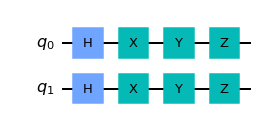

In [3]:
"""string feature map without variable groups:"""
operation_string = "H-X-Y-Z"
feature_map_with_string = LayeredPQC.from_string(num_qubits=2, gate_layers=operation_string)
feature_map_with_string.get_circuit().draw()

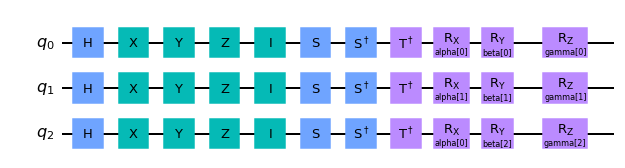

In [4]:
"""string feature map with variable groups"""
""" Declare the variable groups as usual"""
alpha_var = VariableGroup("alpha", size = 2)
beta_var = VariableGroup("beta", size = 3)
gamma_var = VariableGroup("gamma")

"""Single gates always start with a upper case letter followed by lower case letters: 'X', 'Y', 'Z', 'Rx', 'Ry', 'Rz', 'P' and 'U', 
also make sure to put the name of the variable group (not the name of the object itself) in round brackets."""



operation_string = "-H-X-Y-Z-I-S-Sc-Tc-Rx(alpha)-Ry(beta)-Rz(gamma)"




feature_map_with_string = LayeredPQC.from_string(num_qubits=3, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()

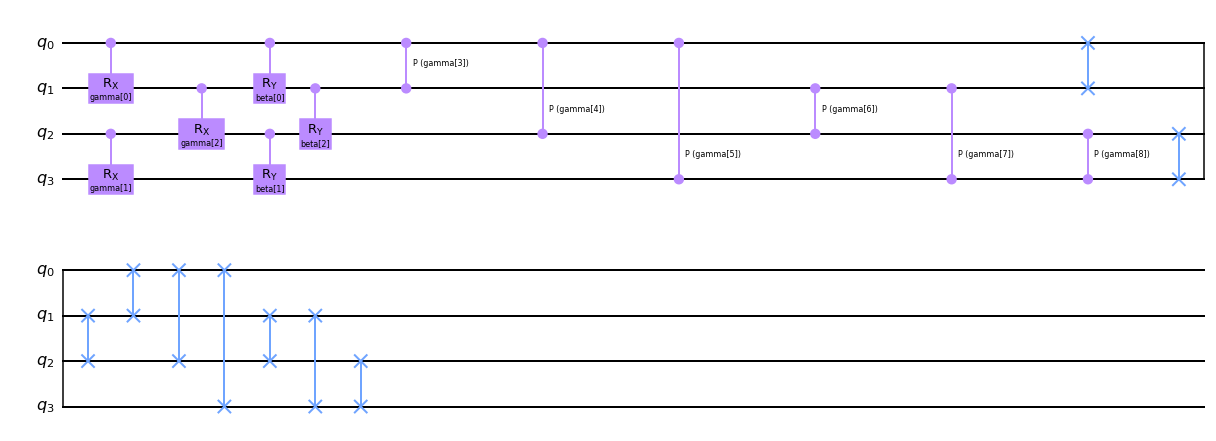

In [5]:
"""Entangling gates have always lower case letters and the strategy ('NN' or 'AA' ('NN' is on default)) is always in capital letters"""
operation_string2 = "-crx(gamma)-cry(beta;NN)-cp(gamma;AA)-cs-cs(AA)"
feature_map_with_string = LayeredPQC.from_string(num_qubits=4, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string2)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()

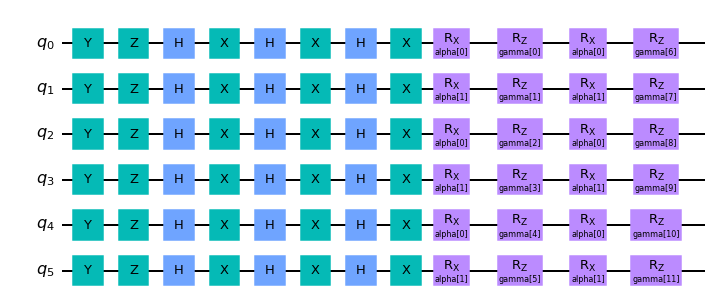

In [6]:
"""With the syntax <number>[<operations>] you can repeat the operations in the bracket, e.g. 3[H-X] so the H and the X gate layers are applied 3 times"""
operation_string3 = "-Y-Z-3[H-X]-2[Rx(alpha)-Rz(gamma)]"
feature_map_with_string = LayeredPQC.from_string(num_qubits=6, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string3)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()

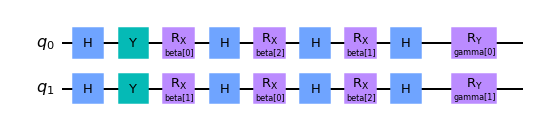

In [7]:
"""Notice that it is not necessary to write any bars "-" (but you can if you want) """
operation_string4 = "HY3[Rx(beta)H]Ry(gamma)"
feature_map_with_string = LayeredPQC.from_string(num_qubits=2, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string4)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()

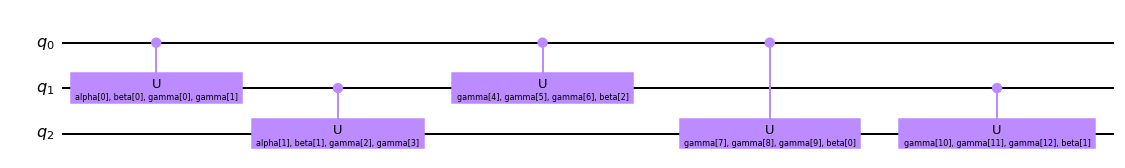

In [8]:
"""You can put spaces between the letters too"""
operation_string5 = "c u(al pha   , be   t a, g am  ma, gamma)-cu(gamma, gamma, g a m m a, b e ta   ; A  A   )"
feature_map_with_string = LayeredPQC.from_string(num_qubits=3, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string5)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()

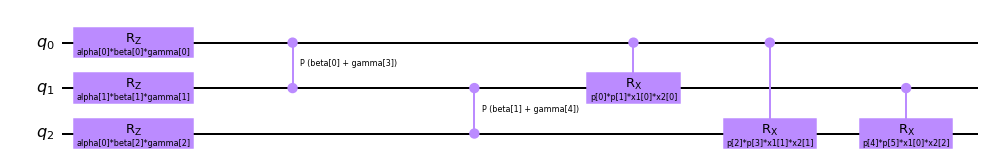

In [9]:
"""It is also possible, to define own maps for some gates (not for U or cu gate layers).
Make sure to use the following syntax: <operation>(<variablegroup_1>,...,<variablegroup_n>;=f(x_1,...,x_n),{x_1,...,x_n})
So you put the variable groups, that you use, at the first position in the bracket expression followed by a semicolon. 
Than put the map you're using after an equal sign and after that a comma an put the variables using in a curved bracket, so the program treats the letters in the map expression as variables:"""

x_var = VariableGroup("x1",size=2)
x_var2 = VariableGroup("x2",size = 3)
p_var = VariableGroup("p")


operation_string6 = "Rz(alpha,gamma,beta;=a*b*c,{a,b,c})-cp(beta,gamma;=x+y,{x,y};NN)-crx(x1,x2,p,p;=a*b*c*d,{a,b,c,d};AA)"
feature_map_with_string = LayeredPQC.from_string(num_qubits=3, variable_groups=(alpha_var, beta_var, gamma_var, x_var, x_var2, p_var), gate_layers=operation_string6)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
x1 = ParameterVector("x1", feature_map_with_string.get_number_of_variables(x_var))
x2 = ParameterVector("x2", feature_map_with_string.get_number_of_variables(x_var2))
p = ParameterVector("p", feature_map_with_string.get_number_of_variables(p_var))
feature_map_with_string.get_circuit(al, be, ga, x1, x2, p).draw()

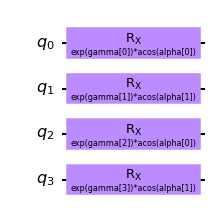

In [10]:
"""You can use numpy functions too. Make sure to import numpy as np otherwise it won't work."""
operation_string7 = "Rx(alpha,gamma;=np.arccos(x)*np.exp(y),{x,y})"
feature_map_with_string = LayeredPQC.from_string(num_qubits=4, variable_groups=(alpha_var, beta_var, gamma_var), gate_layers=operation_string7)

al = ParameterVector("alpha", feature_map_with_string.get_number_of_variables(alpha_var))
be = ParameterVector("beta", feature_map_with_string.get_number_of_variables(beta_var))
ga = ParameterVector("gamma", feature_map_with_string.get_number_of_variables(gamma_var))
feature_map_with_string.get_circuit(al, be, ga).draw()